In [1]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt

from performer.linear_attention import LinearAttention

In [2]:
def measure_inference_time(layer, length, iteration=1000):
    B = 10
    L = length
    F = 128
    stddev = 0.01

    q = tf.random.normal((B, L, F), stddev=stddev)
    k = tf.random.normal((B, L, F), stddev=stddev)
    v = tf.random.normal((B, L, F), stddev=stddev)
    start = time.time()
    for _ in range(iteration):
        layer(q, k, v)
    end = time.time()
    return end - start


def softmax_attention(q, k, v):
    q /= tf.sqrt(float(q.shape[-1]))
    weight = tf.math.softmax(tf.matmul(q, k, transpose_b=True), axis=-1)
    return tf.matmul(weight, v)

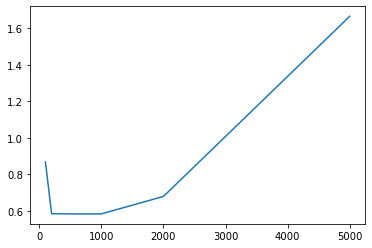

In [3]:
M = 32
layer = LinearAttention(M)
time_elapsed = []
Ls = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000]
for L in Ls:
    time_elapsed.append(measure_inference_time(layer, L))
plt.plot(Ls, time_elapsed)


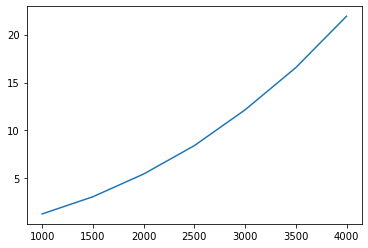

In [6]:
layer = softmax_attention
time_elapsed = []
Ls = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000]
for L in Ls:
    time_elapsed.append(measure_inference_time(layer, L))
plt.plot(Ls, time_elapsed)